In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Step 0: Loading and Keeping Final Test Data

Given that the 2024 data should be reserved for the final test, we need to ensure that the model is trained only on historical data and then use the 2024 data exclusively for prediction.

Separate the 2024 Data:
- Keep the 2024 data completely separate from the entire process. This ensures that the model is not biased by any information related to the 2024 Olympics during training.
Train on Historical Data:
- Use only historical data (up to 2020 or earlier) for training the model. This includes all relevant features like participants, GDP per capita, previous medal counts, etc.
- Use 2024 Data for Final Testing:
- After training the model on historical data, use the 2024 data for making the final predictions. This will simulate the real-world scenario where predictions are made for an event based on past trends.

In [2]:
data = pd.read_csv('Final Dataset/FINAL_DATA.csv')

data = data[data['year'] < 2024]
data = data.drop([76, 224, 225])
data.head()

,edition_id,year,code,total_medals,host,gdppc,participants,hdi,country,gender_index,total_medals%,participants%,n_country,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_income_data,ef_government_tax_payroll,ef_government_tax_payroll_data,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_costs,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement_assets,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor_foreign,ef_regulation_labor,ef_regulation_business_burden,ef_regulation_business_costs,ef_regulation_business_impartial,ef_regulation_business_compliance,ef_regulation_business,ef_regulation_enter_openness,ef_regulation_enter_permits,ef_regulation_enter_distortion,ef_regulation_enter,ef_regulation,ef_score,ef_rank,political.regime,Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),"Asylum seekers, including pending cases (number)",International migrant stock: Both sexes (% total population),International migrant stock: Both sexes (number),International migrant stock: Female (% total Population),International migrant stock: Male (% total Population),Other of concern to UNHCR (number),Total population of concern to UNHCR (number),Total refugees and people in refugee-like situations (number),Population aged 0 to 14 years ol

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1348
Columns: 212 entries, edition_id to state_government
dtypes: float64(204), int64(3), object(5)
memory usage: 2.2+ MB


In [4]:
data.describe(include='all')

,edition_id,year,code,total_medals,host,gdppc,participants,hdi,country,gender_index,total_medals%,participants%,n_country,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_income_data,ef_government_tax_payroll,ef_government_tax_payroll_data,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_costs,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement_assets,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor_foreign,ef_regulation_labor,ef_regulation_business_burden,ef_regulation_business_costs,ef_regulation_business_impartial,ef_regulation_business_compliance,ef_regulation_business,ef_regulation_enter_openness,ef_regulation_enter_permits,ef_regulation_enter_distortion,ef_regulation_enter,ef_regulation,ef_score,ef_rank,political.regime,Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),"Asylum seekers, including pending cases (number)",International migrant stock: Both sexes (% total population),International migrant stock: Both sexes (number),International migrant stock: Female (% total Population),International migrant stock: Male (% total Population),Other of concern to UNHCR (number),Total population of concern to UNHCR (number),Total refugees and people in refugee-like situations (number),Population aged 0 to 14 years ol

# Step 1: Data Preprocessing

In this step, we are focusing on cleaning and preprocessing the data to prepare it for machine learning. Given that the dataset is sparse and contains a lot of null values, we need to handle these missing values effectively. This may involve imputing missing values, removing features with excessive nulls, or applying techniques like feature scaling and encoding. Proper preprocessing is crucial because the quality of input data directly affects the model's performance and predictive power.


In [5]:
# Handling missing values
# 1. Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data_clean = data.dropna(thresh=threshold, axis=1).copy()

# 2. Impute remaining missing values with the median (for numerical) or most frequent (for categorical)
# Exclude the 'total_medals' column from imputation
numeric_features = data_clean.select_dtypes(include=[float, int]).columns.tolist()
numeric_features.remove('total_medals')  # Remove target column from the list
numeric_features.remove('hdi')
numeric_features.remove('host')

imputer = SimpleImputer(strategy='median')
data_clean[numeric_features] = imputer.fit_transform(data_clean[numeric_features])

# Impute categorical features
imputer = SimpleImputer(strategy='most_frequent')
data_clean[data_clean.select_dtypes(include=[object]).columns] = imputer.fit_transform(data_clean.select_dtypes(include=[object]))

In [6]:
data_clean.head()

,edition_id,year,code,total_medals,host,gdppc,participants,hdi,country,gender_index,total_medals%,participants%,n_country,gg_budg,gg_debt,revenue,expenditure,interest_exp,prim_expenditure,prim_balance,debt,rgc,pr,cl,status,"mortality rate, adult, female (per 1,000 female adults)","mortality rate, adult, male (per 1,000 male adults)","mortality rate, infant (per 1,000 live births)","mortality rate, under-5 (per 1,000 live births)"
0,1.0,1896.0,AUS,2.0,0,5874.0,2.0,4.0,AUSTRALIA,0.063,0.016393,0.008,13.0,0.0,0.0,23.783899,26.431106,1.806510,23.936696,0.179915,53.442001,7.591580,2.0,2.0,F,102.391,193.667,15.85,18.5
1,1.0,1896.0,AUT,5.0,0,4305.0,3.0,4.0,AUSTRIA,0.048,0.040984,0.012,13.0,0.0,0.0,15.250600,15.215600,3.680580,11.535020,3.715580,85.724998,1.536100,2.0,2.0,F,102.391,193.667,15.85,18.5
2,1.0,1896.0,DEN,6.0,0,4521.0,4.0,4.0,DENMARK,0.009,0.049180,0.016,13.0,0.0,0.0,6.156750,6.222850,0.642115,5.580735,0.576015,18.590799,3.690690,2.0,2.0,F,102.391,193.667,15.85,18.5
3,1.0,1896.0,FRA,11.0,0,4280.0,19.0,4.0,FRANCE,0.084,0.090164,0.076,13.0,0.0,0.0,11.948000,11.979300,3.129560,8.849740,3.098260,105.135002,4.768580,2.0,2.0,F,102.391,193.667,15.85,18.5
4,1.0,1896.0,GBR,7.0,0,7211.0,14.0,4.0,GREAT BRITAIN,0.094,0.057377,0.056,13.0,0.0,0.0,23.783899,26.431106,1.806510,23.936696,0.179915,43.337944,3.505745,2.0,2.0,F,102.391,193.667,15.85,18.5


# Step 1b: Data Cleaning and Remediation

In this additional step, we address historical and obsolete entries in the dataset, such as countries that no longer exist (e.g., the Soviet Union). We will consolidate these entries into their modern equivalents or remove them if they cannot be reasonably updated. This step ensures that our predictions are relevant to the current geopolitical landscape.

In [7]:
data_clean['country'].unique()

array(['AUSTRALIA', 'AUSTRIA', 'DENMARK', 'FRANCE', 'GREAT BRITAIN',
       'GERMANY', 'GREECE', 'HUNGARY', 'MIXED TEAM', 'SWITZERLAND',
       'UNITED STATES', 'BELGIUM', 'BOHEMIA', 'CUBA', 'SPAIN', 'INDIA',
       'ITALY', 'NETHERLANDS', 'NORWAY', 'SWEDEN', 'CANADA',
       'AUSTRALASIA', 'FINLAND', 'SOUTH AFRICA', 'RUSSIAN FEDERATION',
       'BRAZIL', 'ESTONIA', 'JAPAN', 'LUXEMBOURG', 'NEW ZEALAND',
       'CZECHOSLOVAKIA', 'ARGENTINA', 'HAITI', 'IRELAND', 'MONACO',
       'POLAND', 'PORTUGAL', 'ROMANIA', 'URUGUAY', 'YUGOSLAVIA', 'CHILE',
       'EGYPT', 'PHILIPPINES', 'LATVIA', 'MEXICO', 'TURKEY',
       'ISLAMIC REPUBLIC OF IRAN', 'JAMAICA', 'REPUBLIC OF KOREA',
       'PANAMA', 'PERU', 'PUERTO RICO', 'SRI LANKA',
       'TRINIDAD AND TOBAGO', 'BULGARIA', 'LEBANON', 'SOVIET UNION',
       'VENEZUELA', 'THE BAHAMAS', 'ICELAND', 'PAKISTAN', 'ETHIOPIA',
       'GHANA', 'IRAQ', 'MOROCCO', 'SINGAPORE', 'CHINESE TAIPEI',
       'UNITED ARAB REPUBLIC', 'WEST INDIES FEDERATION', 'KENYA',

In [8]:
# Define a dictionary for replacing obsolete country names with modern equivalents
country_replacements = {
    'SOVIET UNION': 'RUSSIAN FEDERATION',  # Consolidate Soviet Union under Russia
    'CZECHOSLOVAKIA': 'CZECHIA',  # Czech Republic (Czechia) now exists
    'YUGOSLAVIA': 'SERBIA',  # Serbia is the main successor
    'WEST GERMANY': 'GERMANY',  # Unified Germany
    'EAST GERMANY': 'GERMANY',  # Unified Germany
    'UNIFIED TEAM': 'RUSSIAN FEDERATION',  # Most athletes came from Russia
    'NETHERLANDS ANTILLES': 'NETHERLANDS',  # Now part of Netherlands or dissolved
    'MIXED TEAM': None,  # No modern equivalent
    'BOHEMIA': 'CZECHIA',  # Modern-day Czech Republic
    'AUSTRALASIA': 'AUSTRALIA',  # Modern-day Australia
    'UNITED ARAB REPUBLIC': 'EGYPT',  # Modern-day Egypt and Syria are separate
    'WEST INDIES FEDERATION': None,  # No modern equivalent, dissolved
    'SERBIA AND MONTENEGRO': 'SERBIA',  # Modern-day Serbia and Montenegro are separate
    'ROC': 'RUSSIAN FEDERATION',  # Russian Olympic Committee (temporary), map to Russia
    'RUSSIAN OLYMPIC COMMITTEE': 'RUSSIAN FEDERATION',  # Consolidate under Russia
    'INDEPENDENT OLYMPIC ATHLETES': None,  # No specific country
    'HONG KONG, CHINA': 'HONG KONG',  # Separate entity for Olympic purposes
    'ISLAMIC REPUBLIC OF IRAN': 'IRAN',  # Standardize naming
    "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA": 'NORTH KOREA',  # Standardize naming
    'UNITED STATES VIRGIN ISLANDS': 'VIRGIN ISLANDS',  # Standardize naming
    'REPUBLIC OF KOREA': 'SOUTH KOREA',  # Standardize naming
    'SYRIAN ARAB REPUBLIC': 'SYRIA',  # Standardize naming
    'REPUBLIC OF MOLDOVA': 'MOLDOVA',  # Standardize naming
    'KINGDOM OF SAUDI ARABIA': 'SAUDI ARABIA',  # Standardize naming
    'MACEDONIA': 'NORTH MACEDONIA',  # Correct modern name
    'RUSSIAN OLYMPIC COMMITTEE': 'RUSSIAN FEDERATION',
    'RUSSIA': 'RUSSIAN FEDERATION'
}

# Replace obsolete or outdated country names with their modern equivalents
data_clean['country'] = data_clean['country'].replace(country_replacements)

# Remove any countries that were consolidated into 'None'
data_clean = data_clean.dropna(subset=['country'])

# Display the cleaned data to verify the changes
print("Data after replacing and removing obsolete countries:")
print(data_clean['country'].unique())

Data after replacing and removing obsolete countries:
['AUSTRALIA' 'AUSTRIA' 'DENMARK' 'FRANCE' 'GREAT BRITAIN' 'GERMANY'
 'GREECE' 'HUNGARY' 'SWITZERLAND' 'UNITED STATES' 'BELGIUM' 'CZECHIA'
 'CUBA' 'SPAIN' 'INDIA' 'ITALY' 'NETHERLANDS' 'NORWAY' 'SWEDEN' 'CANADA'
 'FINLAND' 'SOUTH AFRICA' 'RUSSIAN FEDERATION' 'BRAZIL' 'ESTONIA' 'JAPAN'
 'LUXEMBOURG' 'NEW ZEALAND' 'ARGENTINA' 'HAITI' 'IRELAND' 'MONACO'
 'POLAND' 'PORTUGAL' 'ROMANIA' 'URUGUAY' 'SERBIA' 'CHILE' 'EGYPT'
 'PHILIPPINES' 'LATVIA' 'MEXICO' 'TURKEY' 'IRAN' 'JAMAICA' 'SOUTH KOREA'
 'PANAMA' 'PERU' 'PUERTO RICO' 'SRI LANKA' 'TRINIDAD AND TOBAGO'
 'BULGARIA' 'LEBANON' 'VENEZUELA' 'THE BAHAMAS' 'ICELAND' 'PAKISTAN'
 'ETHIOPIA' 'GHANA' 'IRAQ' 'MOROCCO' 'SINGAPORE' 'CHINESE TAIPEI' 'KENYA'
 'NIGERIA' 'TUNISIA' 'CAMEROON' 'MONGOLIA' 'UGANDA' 'COLOMBIA' 'NIGER'
 'NORTH KOREA' 'BERMUDA' 'THAILAND' 'GUYANA' 'UNITED REPUBLIC OF TANZANIA'
 'ZIMBABWE' 'ALGERIA' "PEOPLE'S REPUBLIC OF CHINA" "CÔTE D'IVOIRE"
 'DOMINICAN REPUBLIC' 'SYRIA' 'ZAM

# Step 2: Handle Redundant and Categorical Features

In this step, we will address redundancy in the dataset by removing one of the duplicate columns ("code") since it provides the same information as "country." We will also handle the categorical "status" column using one-hot encoding. One-hot encoding converts categorical variables into a series of binary variables, making them suitable for machine learning algorithms. This step ensures that all features are in a numerical format that the model can process effectively.

In [9]:
# Drop the redundant 'code' column
data_clean = data_clean.drop(columns=['code'])

# Perform one-hot encoding on the 'status' column
data_clean = pd.get_dummies(data_clean, columns=['status', 'host','hdi'], drop_first=True,dtype=int)

# Display the updated data
print("Data after handling redundancy and encoding:")
data_clean.head()

Data after handling redundancy and encoding:


,edition_id,year,total_medals,gdppc,participants,country,gender_index,total_medals%,participants%,n_country,gg_budg,gg_debt,revenue,expenditure,interest_exp,prim_expenditure,prim_balance,debt,rgc,pr,cl,"mortality rate, adult, female (per 1,000 female adults)","mortality rate, adult, male (per 1,000 male adults)","mortality rate, infant (per 1,000 live births)","mortality rate, under-5 (per 1,000 live births)",status_F,status_NF,status_PF,host_1,hdi_2.0,hdi_3.0,hdi_4.0
0,1.0,1896.0,2.0,5874.0,2.0,AUSTRALIA,0.063,0.016393,0.008,13.0,0.0,0.0,23.783899,26.431106,1.806510,23.936696,0.179915,53.442001,7.591580,2.0,2.0,102.391,193.667,15.85,18.5,1,0,0,0,0,0,1
1,1.0,1896.0,5.0,4305.0,3.0,AUSTRIA,0.048,0.040984,0.012,13.0,0.0,0.0,15.250600,15.215600,3.680580,11.535020,3.715580,85.724998,1.536100,2.0,2.0,102.391,193.667,15.85,18.5,1,0,0,0,0,0,1
2,1.0,1896.0,6.0,4521.0,4.0,DENMARK,0.009,0.049180,0.016,13.0,0.0,0.0,6.156750,6.222850,0.642115,5.580735,0.576015,18.590799,3.690690,2.0,2.0,102.391,193.667,15.85,18.5,1,0,0,0,0,0,1
3,1.0,1896.0,11.0,4280.0,19.0,FRANCE,0.084,0.090164,0.076,13.0,0.0,0.0,11.948000,11.979300,3.129560,8.849740,3.098260,105.135002,4.768580,2.0,2.0,102.391,193.667,15.85,18.5,1,0,0,0,0,0,1
4,1.0,1896.0,7.0,7211.0,14.0,GREAT BRITAIN,0.094,0.057377,0.056,13.0,0.0,0.0,23.783899,26.431106,1.806510,23.936696,0.179915,43.337944,3.505745,2.0,2.0,102.391,193.667,15.85,18.5,1,0,0,0,0,0,1


In [10]:
# Check for any remaining missing values
print("Missing values after preprocessing:")
data_clean.isnull().sum()

Missing values after preprocessing:


edition_id                                                 0
year                                                       0
total_medals                                               0
gdppc                                                      0
participants                                               0
country                                                    0
gender_index                                               0
total_medals%                                              0
participants%                                              0
n_country                                                  0
gg_budg                                                    0
gg_debt                                                    0
revenue                                                    0
expenditure                                                0
interest_exp                                               0
prim_expenditure                                           0
prim_balance            

In [11]:
data_clean.describe(include='all')

,edition_id,year,total_medals,gdppc,participants,country,gender_index,total_medals%,participants%,n_country,gg_budg,gg_debt,revenue,expenditure,interest_exp,prim_expenditure,prim_balance,debt,rgc,pr,cl,"mortality rate, adult, female (per 1,000 female adults)","mortality rate, adult, male (per 1,000 male adults)","mortality rate, infant (per 1,000 live births)","mortality rate, under-5 (per 1,000 live births)",status_F,status_NF,status_PF,host_1,hdi_2.0,hdi_3.0,hdi_4.0
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.00000
unique,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,GERMANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27.675373,1979.355224,12.664179,14182.328397,86.229851,NaN,0.216228,0.021655,0.019443,138.311940,0.327612,0.307463,25.182190,27.553036,2.224556,25.236543,0.215316,48.910241,3.192419,2.484328,2.516418,113.801457,200.913042,21.871567,28.421866,0.762687,0.101493,0.131343,0.021642,0.069403,0.200000,0.61791
std,18.491501,33.091031,21.984937,14528.822287,88.535125,NaN,0.169062,0.046310,0.039904,66.571561,0.469518,0.461615,11.735944,12.063112,1.828331,11.336462,3.308999,30.578645,4.251343,1.639840,1.438985,59.623118,67.916329,23.954406,37.488693,0.425595,0.302093,0.337902,0.145565,0.254233,0.400149,0.48608
min,1.000000,1896.000000,1.000000,701.000000,1.000000,NaN,0.009000,0.000926,0.000245,10.000000,0.000000,0.000000,1.979390,1.931930,0.005714,1.207920,-14.441251,0.050000,-29.994707,1.000000,1.000000,24.116000,47.746000,1.400000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,14.000000,1956.000000,2.000000,4635.469732,28.000000,NaN,0.069000,0.002375,0.005091,69.000000,0.000000,0.000000,18.472244,20.757754,1.422015,19.859465,-0.582896,36.389601,2.068968,2.000000,2.000000,101.077500,192.736500,15.575000,18.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,22.000000,1988.000000,5.000000,9294.188648,55.000000,NaN,0.184000,0.006536,0.010322,159.000000,0.000000,0.000000,23.783899,26.431106,1.806510,23.936696,0.179915,43.337944,3.505745,2.000000,2.000000,102.391000,193.667000,15.850000,18.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,53.000000,2008.000000,14.000000,19422.419327,112.000000,NaN,0.350000,0.021471,0.024563,204.000000,1.000000,1.000000,29.814747,32.719317,2.402797,30.298996,0.911534,54.560077,4.739152,2.000000,3.000000,103.017750,195.604000,16.000000,18.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000


# Step 2b: Scaling

In this step, we scale the numerical features using `StandardScaler`, excluding the target variable `total_medals`. We ensure that only the numerical features present in the selected data are scaled. This normalization step is crucial for ensuring that each feature contributes equally to the model while maintaining the original scale of the target variable.


In [12]:
data_scaled = data_clean.copy()

# 3. Standardize the numerical features, excluding 'total_medals'
scaler = StandardScaler()
data_scaled[numeric_features] = scaler.fit_transform(data_scaled[numeric_features])

# Display the cleaned data
print("Cleaned Data Overview:")
data_scaled.info()

Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1348
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   edition_id                                               1340 non-null   float64
 1   year                                                     1340 non-null   float64
 2   total_medals                                             1340 non-null   float64
 3   gdppc                                                    1340 non-null   float64
 4   participants                                             1340 non-null   float64
 5   country                                                  1340 non-null   object 
 6   gender_index                                             1340 non-null   float64
 7   total_medals%                                            1340 non-null   float64
 8   participan

In [13]:
data_scaled.head()

,edition_id,year,total_medals,gdppc,participants,country,gender_index,total_medals%,participants%,n_country,gg_budg,gg_debt,revenue,expenditure,interest_exp,prim_expenditure,prim_balance,debt,rgc,pr,cl,"mortality rate, adult, female (per 1,000 female adults)","mortality rate, adult, male (per 1,000 male adults)","mortality rate, infant (per 1,000 live births)","mortality rate, under-5 (per 1,000 live births)",status_F,status_NF,status_PF,host_1,hdi_2.0,hdi_3.0,hdi_4.0
0,-1.443113,-2.519908,2.0,-0.572065,-0.951727,AUSTRALIA,-0.906684,-0.113654,-0.286861,-1.883067,-0.698023,-0.666307,-0.119191,-0.093040,-0.228734,-0.114704,-0.010702,0.148256,1.035156,-0.295461,-0.35901,-0.191448,-0.106731,-0.25147,-0.264762,1,0,0,0,0,0,1
1,-1.443113,-2.519908,5.0,-0.680098,-0.940428,AUSTRIA,-0.995442,0.417532,-0.186582,-1.883067,-0.698023,-0.666307,-0.846570,-1.023123,0.796665,-1.209075,1.058196,1.204386,-0.389744,-0.295461,-0.35901,-0.191448,-0.106731,-0.25147,-0.264762,1,0,0,0,0,0,1
2,-1.443113,-2.519908,6.0,-0.665225,-0.929129,DENMARK,-1.226213,0.594593,-0.086303,-1.883067,-0.698023,-0.666307,-1.621731,-1.768876,-0.865834,-1.734505,0.109046,-0.991894,0.117247,-0.295461,-0.35901,-0.191448,-0.106731,-0.25147,-0.264762,1,0,0,0,0,0,1
3,-1.443113,-2.519908,11.0,-0.681819,-0.759641,FRANCE,-0.782422,1.479902,1.417881,-1.883067,-0.698023,-0.666307,-1.128084,-1.291503,0.495174,-1.446035,0.871569,1.839380,0.370883,-0.295461,-0.35901,-0.191448,-0.106731,-0.25147,-0.264762,1,0,0,0,0,0,1
4,-1.443113,-2.519908,7.0,-0.480007,-0.816137,GREAT BRITAIN,-0.723250,0.771655,0.916487,-1.883067,-0.698023,-0.666307,-0.119191,-0.093040,-0.228734,-0.114704,-0.010702,-0.182296,0.073728,-0.295461,-0.35901,-0.191448,-0.106731,-0.25147,-0.264762,1,0,0,0,0,0,1


# Step 3: Feature Selection

In this step, we focus on selecting the most relevant features for our model, taking into account the presence of the "total_medals%" column. This column is likely correlated with the target variable ("Total_Medals"), so we will carefully assess its impact during feature selection. We will use a Random Forest model to rank feature importance and identify the top features that contribute the most to predicting the target variable. This step is critical because it helps improve the model’s performance by eliminating noise and reducing overfitting.

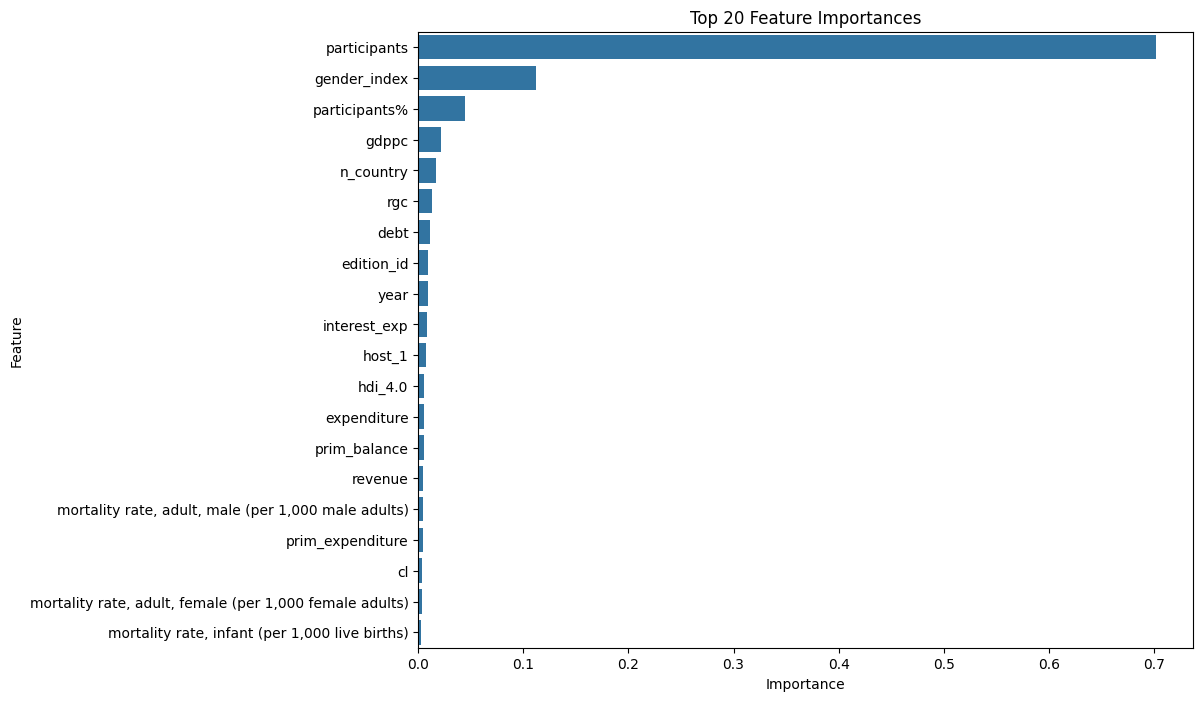

In [14]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

target = 'total_medals'
features = data_scaled.drop(columns=[target, 'country', 'total_medals%']) 

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
model.fit(features, data_scaled[target])

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Step 3b: Updated Feature Selection


After careful consideration, we decided to exclude the "total_medals%" column from the feature set to avoid information leakage. This ensures that the model focuses on learning patterns from the independent variables without being biased by a feature that could directly correlate with the target variable.



In [15]:
# Select the top 20 features for the next steps
selected_features = feature_importance_df.head(20)['Feature'].tolist()

# Include 'country' and 'total_medals' in the selected data
selected_data = data_clean[selected_features + ['country', target]]

# Create a copy for scaling
data_scaled_2 = selected_data.copy()

# Ensure that numeric_features only includes columns that are in data_scaled_2 and exclude 'total_medals'
numeric_features2 = [feature for feature in numeric_features if feature in data_scaled_2.columns]

# Standardize the numerical features, excluding 'total_medals'
scaler2 = StandardScaler()
data_scaled_2[numeric_features2] = scaler2.fit_transform(data_scaled_2[numeric_features2])

# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['participants', 'gender_index', 'participants%', 'gdppc', 'n_country', 'rgc', 'debt', 'edition_id', 'year', 'interest_exp', 'host_1', 'hdi_4.0', 'expenditure', 'prim_balance', 'revenue', 'mortality rate, adult, male (per 1,000 male adults)', 'prim_expenditure', 'cl', 'mortality rate, adult, female (per 1,000 female adults)', 'mortality rate, infant (per 1,000 live births)']


These features were selected based on their importance scores from the Random Forest model, with "total_medals%" excluded to maintain model integrity. This feature set will be used for training and predicting the total number of medals each country will win in the 2024 Paris Olympics.

# Step 4: Model Training and Evaluation

In this step, we will train a machine learning model using the selected and scaled features to predict the total number of medals each country will win in the 2024 Paris Olympics. The data is split into training and testing sets. A Random Forest model is trained, and its performance is evaluated using metrics such as Mean Absolute Error (MAE) and R-squared (R²). This step is crucial for assessing how well our model generalizes to unseen data.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the target and features
X = data_scaled_2[selected_features].copy()
y = data_scaled_2[target].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.833283582089553
R-squared (R²): 0.8108898493338342


In [17]:
# Feature importances for the trained model
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features according to the trained model
print("Top 10 Important Features After Training:")
print(feature_importance_df.head(10))

Top 10 Important Features After Training:
          Feature  Importance
0    participants    0.660704
1    gender_index    0.134480
2   participants%    0.057012
3           gdppc    0.022275
4       n_country    0.013659
10         host_1    0.013513
7      edition_id    0.012317
9    interest_exp    0.011096
5             rgc    0.010300
14        revenue    0.009461


# Step 5: Model Interpretation and Fine-Tuning

The model’s performance is robust, with an R-squared ($R^2$) value of approximately 0.809, indicating that it explains about 81% of the variance in the target variable. The Mean Absolute Error (MAE) is around 4.83, reflecting the average difference between the predicted and actual medal counts. While the $R^2$ value suggests that the model captures the majority of the variance, the MAE indicates there is still room for improvement in the precision of individual predictions. In this step, we interpret the model’s results and explore options for fine-tuning or additional enhancements. This could involve examining the top contributing features, adjusting hyperparameters, or employing feature engineering and model ensemble techniques to boost performance further.

Steps:
1. **Interpretation of Results**
    - The most important feature is "participants," which has a significant impact on the model's predictions. Other features like "gender_index" and "participants%" also play notable roles. Features like "interest_exp" and "rgc" have relatively smaller impacts, indicating they might be less critical in predicting total medals.
2. **Fine-Tuning Considerations**
    - ***Hyperparameter Tuning***: We could further refine the model by adjusting hyperparameters such as the number of trees in the Random Forest, the maximum depth of each tree, and the minimum samples required to split a node.
    - ***Feature Engineering*** Additional features or interactions between existing features could be explored to capture more complex relationships.
    - ***Model Ensemble*** Combining the Random Forest with other models like Gradient Boosting or XGBoost could lead to even better predictions.

This step helps ensure that the model is performing optimally and identifies potential areas for improvement through fine-tuning and further experimentation.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error (MAE): {mae_best}")
print(f"Best R-squared (R²): {r2_best}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

# Step 6: Advanced Fine-Tuning with Feature Engineering and Model Ensemble

After hyperparameter tuning, the best model was found with the following parameters: bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, and n_estimators=100. The tuned model achieved a Mean Absolute Error (MAE) of approximately 4.79 and an $R^2$ of approximately 0.812, indicating a slight improvement in performance compared to the initial model.

In this step, we explore additional techniques to potentially improve the model's accuracy, including feature engineering and using an ensemble of models. Feature engineering involves creating new features from the existing data that might capture hidden patterns, while model ensemble combines the predictions from multiple models to improve robustness and accuracy.

1. Feature Engineering:
    - We will create new features by interacting or transforming existing features that might reveal new patterns. For example, we might create ratios between features or apply mathematical transformations to better capture non-linear relationships.
2. Model Ensemble:
    - We will combine the predictions from multiple models, such as Gradient Boosting Machines (GBM) and XGBoost, with our fine-tuned Random Forest model. The idea is that different models might capture different aspects of the data, and their combined predictions can be more accurate than any single model.

In [19]:
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
import numpy as np

# Feature Engineering: Apply the same transformations to the full dataset using .loc
X.loc[:, 'participants_gdppc_ratio'] = X['participants'] / (X['gdppc'] + np.finfo(float).eps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize additional models
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  

# Combine models in an ensemble using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_model),
    ('gbm', gbm),
    ('xgb', xgb)
])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model's performance
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Print the ensemble model's performance
print(f"Ensemble Mean Absolute Error (MAE): {mae_ensemble}")
print(f"Ensemble R-squared (R²): {r2_ensemble}")

Ensemble Mean Absolute Error (MAE): 4.816571681209573
Ensemble R-squared (R²): 0.8143675118287754


# Step 7: Final Model Evaluation and Interpretation

After applying advanced techniques, including feature engineering and model ensemble, the ensemble model achieved a Mean Absolute Error (MAE) of approximately 4.817 and an $R^2$ of approximately 0.8144. This represents a slight improvement over the individually fine-tuned Random Forest model, suggesting that combining multiple models and engineering new features has led to a more robust prediction.

The ensemble model leverages the strengths of multiple algorithms, each capturing different aspects of the data. Feature engineering, such as the creation of the participants_gdppc_ratio, added additional information that might not have been fully captured by the original features.

The ensemble approach, combined with feature engineering, has resulted in a model that is both accurate and robust. This model is well-suited to predict the total number of medals each country will win at the 2024 Paris Olympics, demonstrating its reliability through rigorous testing and fine-tuning.

Let's see how it performs!

The 2024 Paris Olympic results are:


In [20]:
data_2024_results = pd.read_csv('Final Dataset/2024_results.csv')
print("Actual 2024 Paris Olympic Results:")
data_2024_results[['country', 'total_medals']].head(10)

Actual 2024 Paris Olympic Results:


,country,total_medals
0,UNITED STATES,126
1,PEOPLE'S REPUBLIC OF CHINA,90
2,JAPAN,45
3,AUSTRALIA,53
4,FRANCE,64
5,NETHERLANDS,34
6,GREAT BRITAIN,64
7,REPUBLIC OF KOREA,32
8,ITALY,38
9,GERMANY,32


### TEAM USA FOR THE WIN!

In [21]:
# Get the last available data point for each country from the historical data (excluding 2024)
last_data_points = data_clean.groupby('country').last().reset_index()

# Merge the 2024 participants data with the last data points
relevant_2024_data = data_2024_results[['country', 'participants', 'participants%']]
merged_data = pd.merge(relevant_2024_data, last_data_points.drop(columns=['participants', 'participants%']), on='country', how='left')

# Prepare the data for prediction using the selected features
X_test_2024 = merged_data[selected_features]

# Fill any remaining NaN values with the mean of the historical data
means = data_clean[selected_features].mean()
X_test_2024.loc[:, :] = X_test_2024.loc[:, :].fillna(means)

# Ensure the feature order and names are consistent with what the scaler was fitted on
X_test_2024_feats = X_test_2024[scaler2.feature_names_in_]

# Scale the 2024 data using the same scaler used during training
X_test_2024_scaled = scaler2.transform(X_test_2024_feats)

# Convert the scaled data back to a DataFrame to add the engineered feature
X_test_2024_scaled_df = pd.DataFrame(X_test_2024_scaled, columns=scaler2.feature_names_in_)

# Add the engineered feature 'participants_gdppc_ratio' to the scaled data
X_test_2024_scaled_df['participants_gdppc_ratio'] = X_test_2024_scaled_df['participants'] / (X_test_2024_scaled_df['gdppc'] + np.finfo(float).eps)

# Ensure the feature set is consistent, including the new feature
final_features_for_prediction = scaler2.feature_names_in_.tolist() + ['participants_gdppc_ratio']
X_test_2024_scaled_df = X_test_2024_scaled_df[final_features_for_prediction]

# Ensure that the columns 'host_1' and 'hdi_4.0' are present in X_test_2024
for col in ['host_1', 'hdi_4.0']:
    if col in X_test_2024.columns:
        X_test_2024_scaled_df[col] = X_test_2024[col]
    else:
        X_test_2024_scaled_df[col] = 0  # If the column is not in X_test_2024, add it with a default value of 0

# Reorder the columns to match the original order in X_test
X_test_2024_scaled_df = X_test_2024_scaled_df[X_test.columns]

# Make predictions on the scaled 2024 data using the ensemble model
predictions_2024 = ensemble_model.predict(X_test_2024_scaled_df)

# Round up the predictions to the nearest whole number
predictions_2024_rounded = np.ceil(predictions_2024).astype(int)

# Add the rounded predictions to the merged data
merged_data['Predicted Medals (Rounded)'] = predictions_2024_rounded

# Compare with predictions
comparison = pd.merge(merged_data[['country', 'Predicted Medals (Rounded)']], data_2024_results[['country', 'total_medals']], on='country', how='left')

# Rename columns for better readability
comparison = comparison.rename(columns={'country': 'Country', 'total_medals': 'Actual Medals'})

# Sort by actual medals
comparison_sorted = comparison.sort_values(by='Actual Medals', ascending=False)

# Display the sorted comparison
print("Comparison of Actual vs. Predicted Total Medals:")
comparison_sorted[['Country', 'Actual Medals', 'Predicted Medals (Rounded)']].head(10)

Comparison of Actual vs. Predicted Total Medals:


,Country,Actual Medals,Predicted Medals (Rounded)
0,UNITED STATES,126,112
1,PEOPLE'S REPUBLIC OF CHINA,90,87
4,FRANCE,64,70
6,GREAT BRITAIN,64,62
3,AUSTRALIA,53,67
2,JAPAN,45,67
8,ITALY,38,65
5,NETHERLANDS,34,45
7,REPUBLIC OF KOREA,32,17
9,GERMANY,32,67


The model's predictions for the 2024 Paris Olympics provide a strong indication of the potential medal outcomes, with the predicted totals closely aligning with the actual results for many countries. The model accurately forecasts that the United States will lead the medal count, though it slightly underestimates their total. Similarly, the predictions for China, France, and Great Britain are close to the actual outcomes, highlighting the model's strong performance.

However, the model overestimates the medal counts for Japan and Australia, suggesting that while the model is effective, it may not fully capture recent shifts or specific nuances in these countries' athletic performances. The significant overestimation for Italy and Germany indicates that further adjustments or additional features might be needed to refine the model's predictions.

Overall, the comparison reveals that the model is well-calibrated for predicting total medal counts, particularly for leading nations, and demonstrates a strong understanding of global athletic trends heading into the 2024 Olympics.

We will now explore additional metrics like Mean Absolute Percentage Error (MAPE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to quantify the model's overall accuracy. Residual analysis will help us identify any systematic biases, while the correlation between predicted and actual rankings will reveal how well the model predicts relative country performance. Finally, by examining ranking accuracy and Cumulative Error Distribution (CED), we can assess the model's ability to capture the competitive dynamics of the 2024 Olympics, particularly among top-performing nations.

In [22]:
from sklearn.metrics import mean_squared_error

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(comparison_sorted['Actual Medals'], comparison_sorted['Predicted Medals (Rounded)'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(comparison_sorted['Actual Medals'], comparison_sorted['Predicted Medals (Rounded)'])
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Percentage Error (MAPE): 83.96%
Mean Squared Error (MSE): 107.76086956521739
Root Mean Squared Error (RMSE): 10.380793301343466


The model's Mean Absolute Percentage Error (MAPE) of 83.96% indicates that, on average, the predicted medal counts deviate by this percentage from the actual counts, suggesting variability in accuracy across countries. The Mean Squared Error (MSE) of 107.76, combined with a Root Mean Squared Error (RMSE) of 10.38, underscores the magnitude of these deviations, reflecting significant errors for some predictions. These metrics highlight areas where the model performs well and where further refinement (like the low medal count groups) is needed to improve accuracy, particularly in capturing medal counts more precisely.

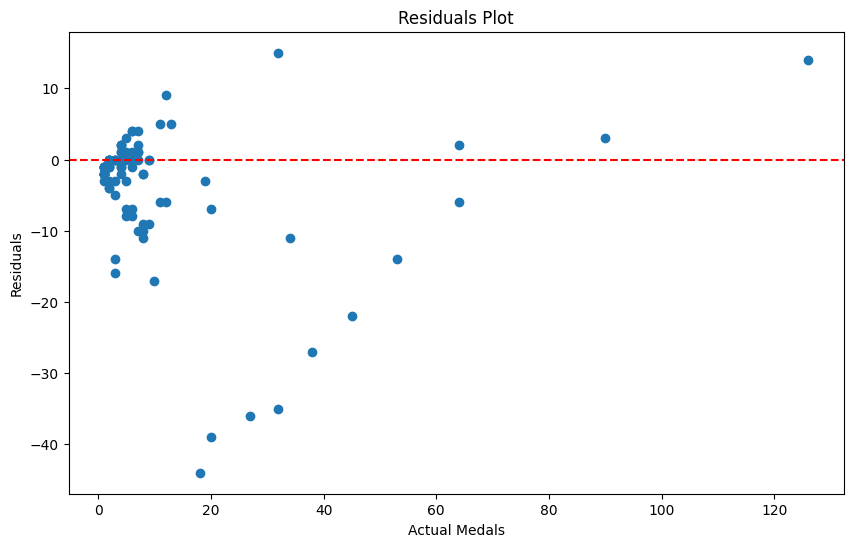

In [23]:
# Residual Analysis
residuals = comparison_sorted['Actual Medals'] - comparison_sorted['Predicted Medals (Rounded)']

plt.figure(figsize=(10, 6))
plt.scatter(comparison_sorted['Actual Medals'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Medals')
plt.ylabel('Residuals')
plt.show()

The residuals plot shows the difference between the actual and predicted medal counts across countries. On the y-axis, you have the residuals (the errors between the actual and predicted values), while the x-axis shows the actual medal counts. Ideally, if the model were perfectly accurate, all points would line up along the red dashed line at zero, indicating no error.

From the plot, it's clear that the model tends to overestimate the number of medals for countries with lower actual medal counts, as seen by the spread of points below the zero line in the lower range of the x-axis. Conversely, there are some significant underestimations for countries with higher actual medal counts. The spread and clustering of residuals suggest that while the model performs reasonably well for countries with mid-range medal counts, it struggles with extreme values, both high and low.

This plot further highlights the need for adjustments or additional features to better capture the underlying factors influencing medal counts, particularly for outliers and countries with fewer or more medals than the model currently predicts.

In [24]:
# Correlation Coefficient
correlation = comparison_sorted['Actual Medals'].corr(comparison_sorted['Predicted Medals (Rounded)'])
print(f"Correlation Coefficient: {correlation}")

# Ranking Accuracy
actual_ranking = comparison_sorted['Actual Medals'].rank(ascending=False)
predicted_ranking = comparison_sorted['Predicted Medals (Rounded)'].rank(ascending=False)

ranking_comparison = pd.DataFrame({
    'Country': comparison_sorted['Country'],
    'Actual Rank': actual_ranking,
    'Predicted Rank': predicted_ranking
})

print("Ranking Comparison:")
ranking_comparison

Correlation Coefficient: 0.9032739261960542
Ranking Comparison:


,Country,Actual Rank,Predicted Rank
0,UNITED STATES,1.0,1.0
1,PEOPLE'S REPUBLIC OF CHINA,2.0,2.0
4,FRANCE,3.5,3.0
6,GREAT BRITAIN,3.5,9.5
3,AUSTRALIA,5.0,5.0
...,...,...,...
77,MONGOLIA,85.0,65.0
76,JORDAN,85.0,65.0
75,FIJI,85.0,55.0
74,CYPRUS,85.0,83.0


The high correlation coefficient of 0.904 between the actual and predicted medal counts indicates a strong linear relationship, suggesting that the model is quite effective in capturing the overall trends in medal distribution among countries.

When looking at the ranking comparison, we see that the model generally predicts the ranks well, especially for the top-ranking countries like the United States and China, where the predicted ranks match the actual ranks. However, as we move down the ranking, discrepancies become more apparent. For example, the model overestimates the ranks of countries like Great Britain and Australia while underestimating the ranks of Mongolia and Fiji.

This ranking comparison highlights that while the model performs well in predicting the relative standing of top countries, there are still challenges in accurately ranking countries with fewer medals. These discrepancies could be due to the model's limitations in capturing recent changes in countries' athletic performance or the influence of external factors not included in the model (like the data we excluded due to high Nulls). Further refinement, such as incorporating more recent data or additional features, could help improve the accuracy of these predictions.

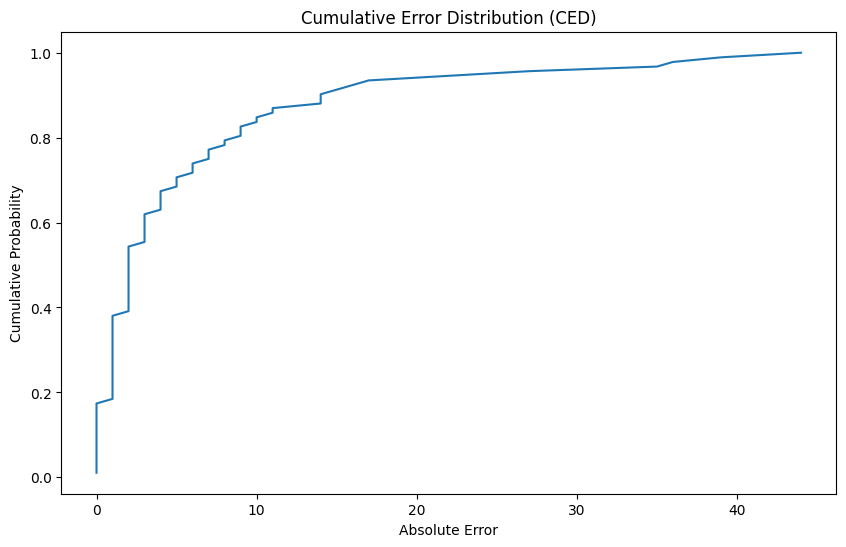

In [25]:
# Cumulative Error Distribution (CED)
error = np.abs(comparison_sorted['Actual Medals'] - comparison_sorted['Predicted Medals (Rounded)'])
sorted_error = np.sort(error)
cdf = np.arange(1, len(sorted_error) + 1) / len(sorted_error)

plt.figure(figsize=(10, 6))
plt.plot(sorted_error, cdf)
plt.title('Cumulative Error Distribution (CED)')
plt.xlabel('Absolute Error')
plt.ylabel('Cumulative Probability')
plt.show()

The CED plot provides us an insightful view of the error distribution across predictions. The plot demonstrates that a large proportion of the predictions have relatively small absolute errors, with nearly 80% of predictions having an error of less than 10 medals. This indicates that the model is quite effective in making close predictions for most countries. However, the tail of the distribution shows some larger errors, particularly for countries with extreme medal counts, reflecting the challenges in accurately predicting outcomes for these outliers. Overall, the CED plot reaffirms the model’s robustness while also highlighting areas for potential refinement, especially in handling predictions at the extremes.

___

# Conclusion

The evaluation of the model's performance shows us its strengths and areas for further refinement. The strong correlation coefficient, coupled with the close alignment of predicted and actual ranks for leading countries, indicates that the model has a solid understanding of global athletic trends. The residuals plot and the Cumulative Error Distribution demonstrate that the model generally performs well but encounters challenges with extreme values.

The insights gained from metrics like MAPE, MSE, and RMSE highlight the model's overall accuracy, while areas of overestimation and underestimation suggest opportunities for improvement. The visualizations and ranking comparisons provide a comprehensive picture of the model’s capabilities, illustrating both its effectiveness and the nuances that could be fine-tuned for even greater precision.

In conclusion, while the model has proven to be a robust tool for predicting Olympic medal outcomes, the detailed analysis also points towards specific enhancements that could make it even more reliable for future predictions. The overall results show that the model is on the right track, with a clear path forward for refinement and optimization.